# 数据科学编程实验Ⅱ-Python实践

## Assignment 5: Cluster

## 聂嘉一 320200931181

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1.Form clusters using petal width and length

In [13]:
data = pd.read_csv("Iris.csv")
data

feature_1 = data.loc[:,'PetalLengthCm']
feature_2 = data.loc[:,'PetalWidthCm']
X = []
for n in range(0,len(feature_1)):
    tmp = []
    tmp.append(feature_1[n])
    tmp.append(feature_2[n])
    X.append(tmp)

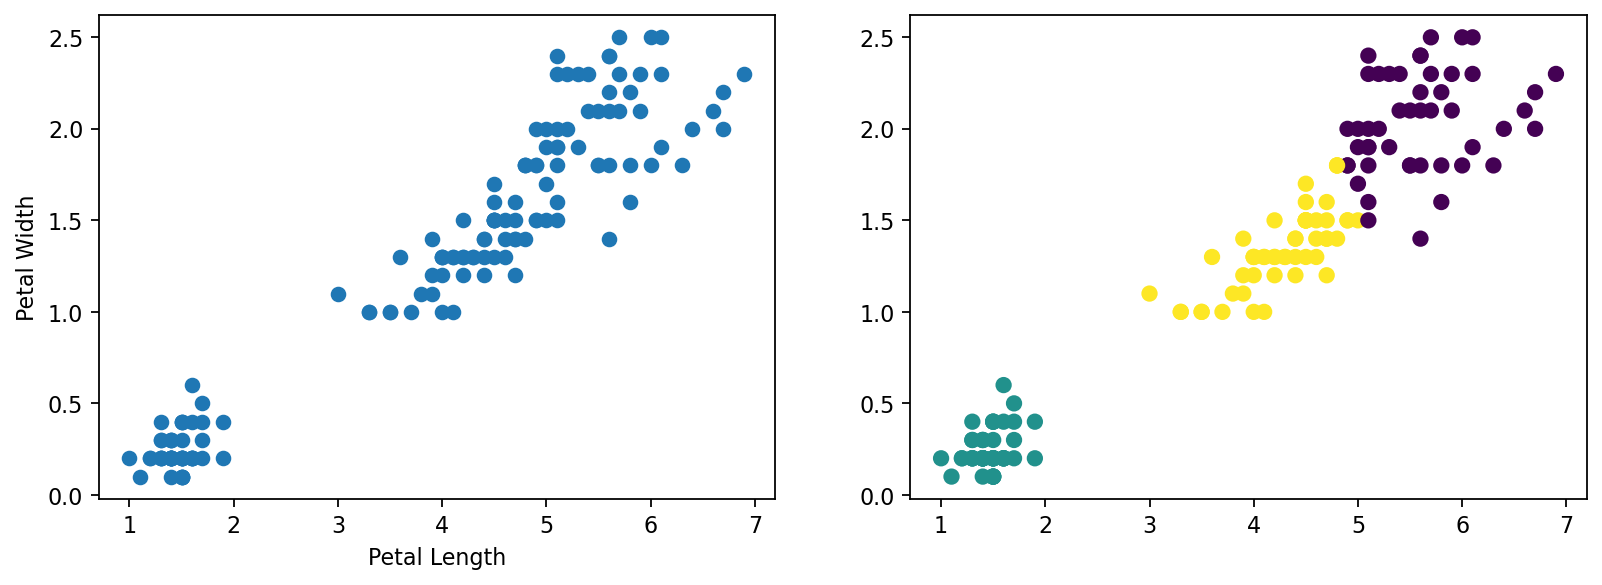

In [14]:
def drawPlot(X):
    fig = plt.figure(figsize=(12, 4), dpi=160)
    ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)

    ax1.scatter(feature_1,feature_2)
    ax1.set_xlabel('Petal Length')
    ax1.set_ylabel('Petal Width')

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    ax2.scatter(feature_1,feature_2,c=y_kmeans,s=40)
    
drawPlot(X)

# 2.Preprocessing (Data scaling)

## 2.1 Normalization

In [15]:
def norm(feature):
    maximum = feature.max()
    minimum = feature.min()
    new_feature = []
    for i in feature:
        new_feature.append((2 * i - maximum -minimum)/(maximum - minimum))
        
    return new_feature

# norm_feature_1 = norm(feature_1)
# norm_feature_2 = norm(feature_2)

In [23]:
def normTrainData():
    norm_feature_1 = norm(feature_1)
    norm_feature_2 = norm(feature_2)
    X_norm = []
    for n in range(0,len(norm_feature_1)):
        tem = []
        tem.append(norm_feature_1[n])
        tem.append(norm_feature_2[n])
        X_norm.append(tem)
        
    return X_norm

## 2.2 Ploting After Normalization

### By comparing the plots before and after normalization, it can be seen that data scaling is helpful.

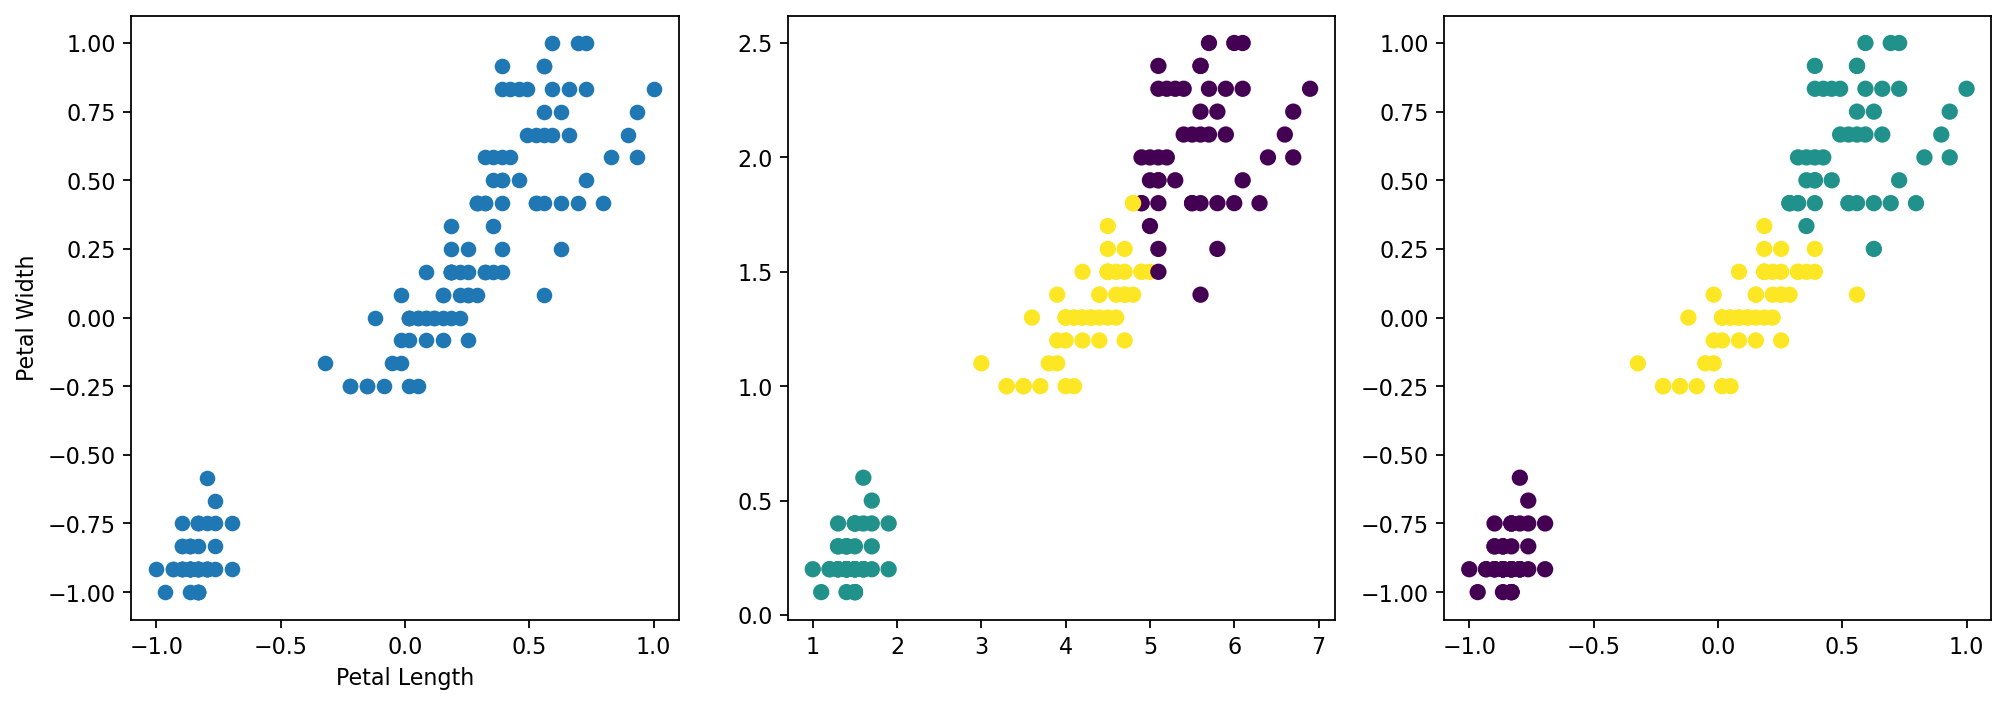

In [21]:
def drawNormPlot():
    fig = plt.figure(figsize=(15, 5), dpi=160)
    ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((1, 3), (0, 1), rowspan=1, colspan=1)
    ax3 = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)

    ax1.scatter(norm(feature_1),norm(feature_2))
    ax1.set_xlabel('Petal Length')
    ax1.set_ylabel('Petal Width')
    

    kmeans = KMeans(n_clusters=3)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    X_norm = normTrainData()
    kmeans.fit(X_norm)
    y_norm_kmeans = kmeans.predict(X_norm)

    ax2.scatter(feature_1,feature_2,c=y_kmeans,s=40)
    ax3.scatter(norm(feature_1),norm(feature_2),c=y_norm_kmeans,s=40)
    
drawNormPlot()

# 3.Draw elbow plot & figure out optimal value

## KMeans After Normalization

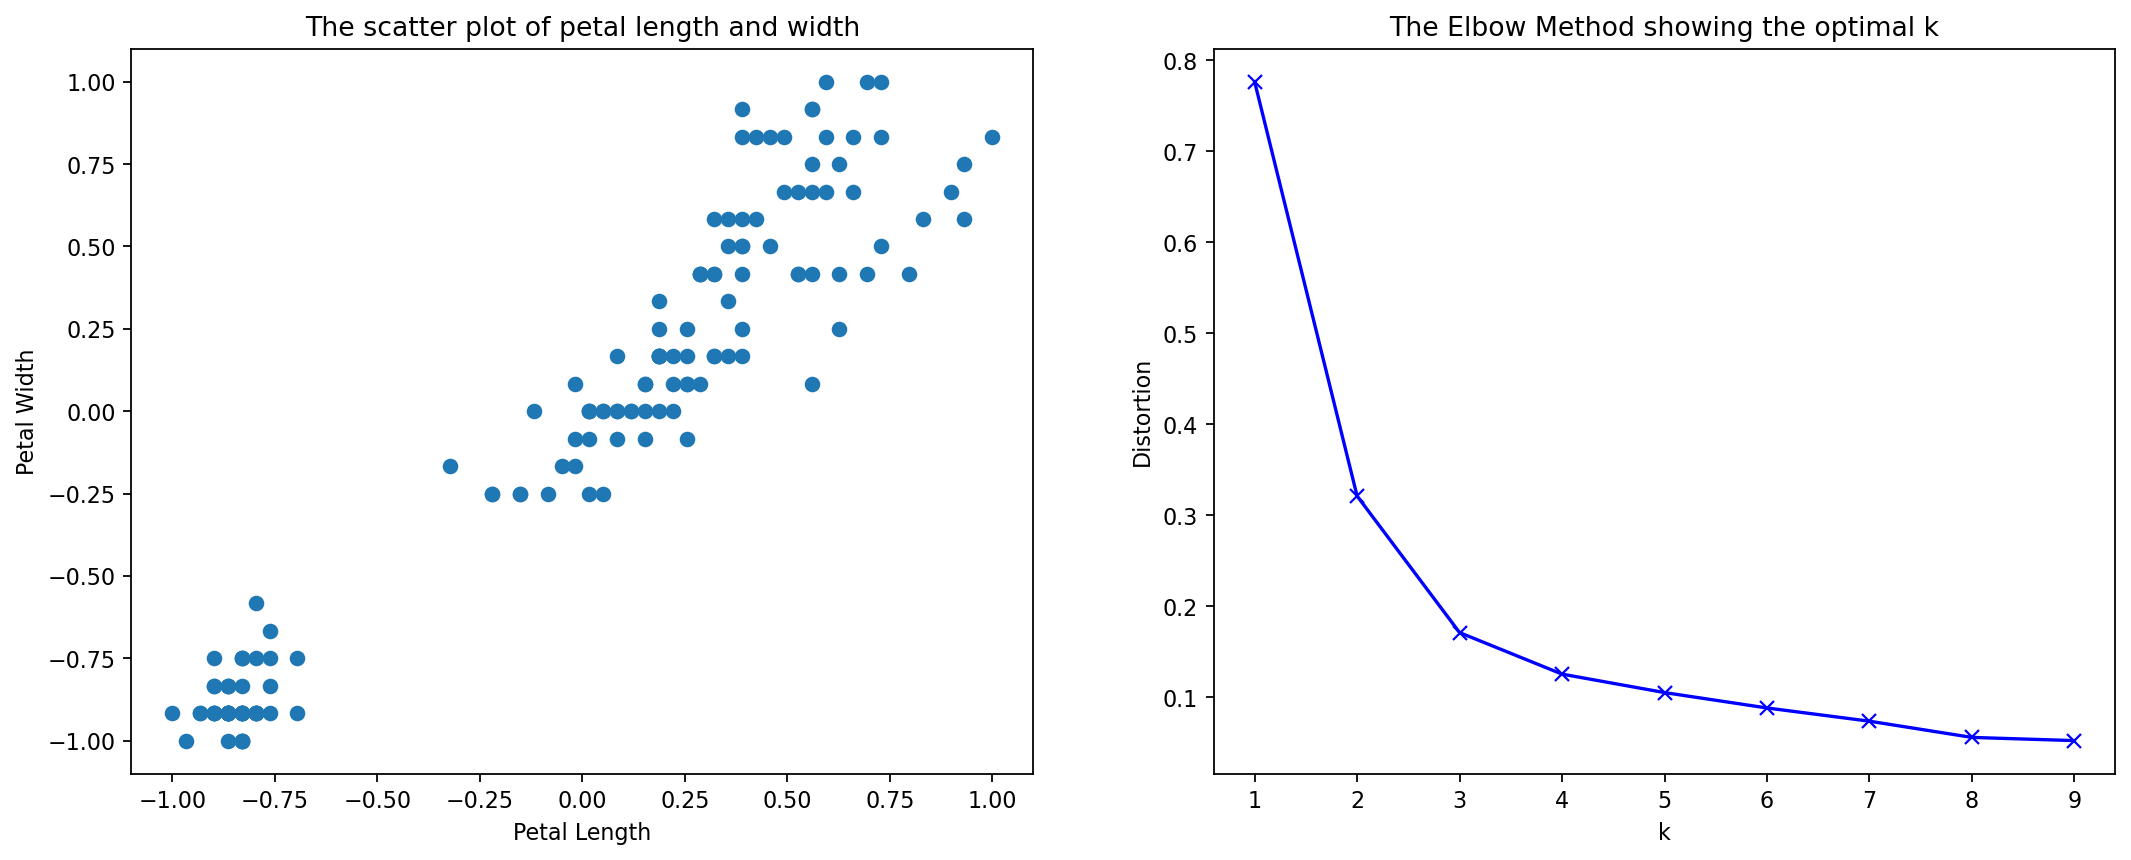

In [22]:
from scipy.spatial.distance import cdist
import  warnings
warnings.filterwarnings("ignore")

def drawElbowPlot():
    fig = plt.figure(figsize=(16, 6), dpi=160)
    ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
    ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)

    X_elbow = np.array(list(zip(norm(feature_2), norm(feature_2)))).reshape(len(norm(feature_2)), 2)
    distortions = []
    K = range(1, 10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X_elbow)
        distortions.append(sum(np.min(cdist(X_elbow, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_elbow.shape[0])
        
    ax1.scatter(norm(feature_1), norm(feature_2))
    ax1.set_xlabel('Petal Length')
    ax1.set_ylabel('Petal Width')
    ax1.set_title('The scatter plot of petal length and width')

    ax2.plot(K, distortions, 'bx-')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Distortion')
    ax2.set_title('The Elbow Method showing the optimal k')
    
drawElbowPlot()

### So we can see from the elbow plot above that k=3 is the optimal value.